In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [179]:
df = pd.read_csv("placement-dataset.csv")

In [180]:
df = df.iloc[:,1:]

In [181]:
avg1 = df["iq"]

In [182]:
np.max(avg1)

233.0

In [183]:
stname = df[df['iq'] == 233.0]

In [184]:
stname

,cgpa,iq,placement
50,3.5,233.0,0


<function matplotlib.pyplot.show(close=None, block=None)>

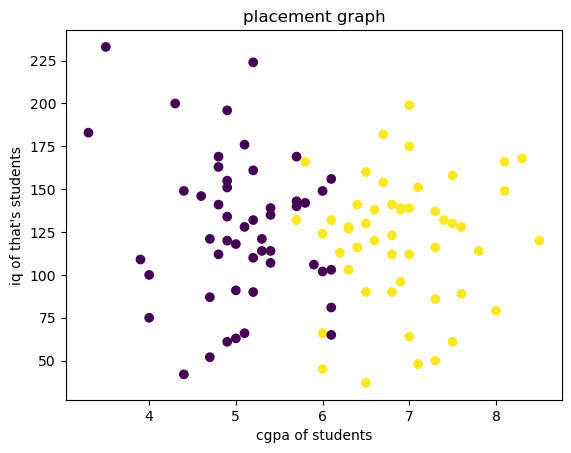

In [185]:
x1 = df["cgpa"]
y1 = df["iq"] 

plt.scatter(x1, y1, c=df['placement'])
plt.xlabel("cgpa of students")
plt.ylabel("iq of that's students")
plt.title("placement graph")
plt.show


In [186]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1] 

In [187]:
x

0     6.8
1     5.9
2     5.3
3     7.4
4     5.8
     ... 
95    4.3
96    4.4
97    6.7
98    6.3
99    6.2
Name: cgpa, Length: 100, dtype: float64

In [188]:
y.shape

(100,)

In [213]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.1)

In [215]:
X_train

,cgpa,iq
83,7.5,130.0
46,5.3,114.0
1,5.9,106.0
98,6.3,103.0
58,8.0,79.0
...,...,...
82,6.5,37.0
22,4.9,120.0
48,6.6,138.0
4,5.8,142.0


In [219]:
y_train

83    1
46    0
1     0
98    1
58    1
     ..
82    1
22    0
48    1
4     0
41    0
Name: placement, Length: 90, dtype: int64

In [221]:
from sklearn.preprocessing import StandardScaler

In [223]:
scaler = StandardScaler()

In [225]:
X_train = scaler.fit_transform(X_train)

In [227]:
X_train

array([[ 1.32402363,  0.17977793],
       [-0.65153537, -0.21246482],
       [-0.11274655, -0.40858619],
       [ 0.246446  , -0.48213171],
       [ 1.77301431, -1.07049583],
       [ 0.78523481,  0.40041447],
       [ 0.246446  ,  0.13074758],
       [ 1.86281245,  1.06232411],
       [ 0.42604227,  0.17977793],
       [ 0.42604227, -0.80082894],
       [ 0.06684972,  0.22880827],
       [-1.10052605,  0.98877859],
       [ 0.78523481,  0.3758993 ],
       [-1.01072791,  0.69459653],
       [ 2.22200499, -0.06537379],
       [-1.90870927, -0.33504068],
       [-0.7413335 ,  2.48420406],
       [-1.54951673,  1.89583994],
       [-0.02294841, -1.90401167],
       [-0.29234282,  0.22880827],
       [ 0.06684972, -1.41370823],
       [-0.02294841, -1.38919306],
       [ 0.78523481, -0.65373791],
       [ 0.87503295, -0.26149516],
       [ 0.87503295,  1.28296065],
       [ 0.42604227,  0.91523308],
       [-1.01072791,  0.27783861],
       [ 0.96483109, -1.83046615],
       [ 0.5158404 ,

In [229]:
x_test = scaler.transform(X_test)

In [231]:
x_test

array([[-1.10052605, -0.26149516],
       [-0.92092977, -0.11440413],
       [ 1.14442736, -0.16343448],
       [-1.81891114, -0.55567722],
       [ 1.86281245,  0.64556619],
       [ 1.14442736,  0.35138413],
       [-1.01072791,  0.79265722],
       [-0.56173723, -0.38407102],
       [-1.01072791,  1.79777926],
       [-0.83113164,  0.13074758]])

In [235]:
from sklearn.linear_model import LogisticRegression

In [237]:
 clf = LogisticRegression()

In [245]:
# model training
clf.fit(X_train, y_train)

LogisticRegression()

In [255]:
y_pred = clf.predict(x_test)

In [257]:
y_test

59    0
67    0
72    1
18    0
37    1
61    1
76    0
81    0
80    0
86    0
Name: placement, dtype: int64

In [259]:
from sklearn.metrics import accuracy_score

In [263]:
accuracy_score(y_test, y_pred)

1.0

In [268]:
import pickle

In [272]:
pickle.dump(clf,open('model.pkl','wb'))